In [1]:
import matplotlib
matplotlib.use('agg')
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(tf.__version__)

1.3.0


In [8]:
csv_file_name = "./data/period_trend.csv"

In [9]:
reader = tf.contrib.timeseries.CSVReader(csv_file_name)
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader,
                                                           batch_size=16,
                                                           window_size=16)

In [14]:
data = reader.read_full()

with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    data = sess.run(data)
    
    coord.request_stop()

In [11]:
ar = tf.contrib.timeseries.ARRegressor(periodicities=100,
                                       input_window_size=10, 
                                       output_window_size=6,
                                       num_features=1,
                                       loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\wuht\\AppData\\Local\\Temp\\tmpxp_anwy5', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\wuht\AppData\Local\Temp\tmpxp_anwy5\model.ckpt.
INFO:tensorflow:loss = 1.41316, step = 1
INFO:tensorflow:global_step/sec: 952.381
INFO:tensorflow:loss = -0.093184, step = 101 (0.107 sec)
INFO:tensorflow:global_step/sec: 800.002
INFO:tensorflow:loss = -0.508455, step = 201 (0.127 sec)
INFO:tensorflow:global_step/sec: 746.267
INFO:tensorflow:loss = -0.71926, step = 301 (0.132 sec)
INFO:tensorflow:global_step/sec: 751.88
INFO:tensorflow:loss = -0.615726, step = 401 (0.133 sec)
INFO:tensorflow:global_step/sec: 791.139
INFO:te

In [12]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
# keys of evaluation: ['covariance', 'loss', 'mean', 'observed', 'start_tuple', 'times', 'global_step']
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)

(predictions, ) = tuple(ar.predict(input_fn=tf.contrib.timeseries.predict_continuation_input_fn(evaluation,
                                                                                                steps=250)))

INFO:tensorflow:Starting evaluation at 2017-10-04-06:02:15
INFO:tensorflow:Restoring parameters from C:\Users\wuht\AppData\Local\Temp\tmpxp_anwy5\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-10-04-06:02:16
INFO:tensorflow:Saving dict for global step 1000: covariance = [[[ 1.78943145]
  [ 1.13213539]
  [ 1.43847108]
  [ 1.28122985]
  [ 1.18644559]
  [ 1.38343859]
  [ 1.27082038]
  [ 1.46004832]
  [ 0.96264774]
  [ 1.56083441]
  [ 1.19118404]
  [ 1.36641908]
  [ 1.56045115]
  [ 1.00982845]
  [ 1.41942632]
  [ 1.87044334]
  [ 1.2406168 ]
  [ 1.7932297 ]
  [ 1.42129278]
  [ 1.0300014 ]
  [ 0.93518651]
  [ 0.87128699]
  [ 0.81832933]
  [ 1.02889049]
  [ 1.2745465 ]
  [ 0.82697964]
  [ 1.0159024 ]
  [ 1.35022604]
  [ 1.38436913]
  [ 1.47297096]
  [ 1.1713953 ]
  [ 1.08111513]
  [ 1.46656048]
  [ 1.41124535]
  [ 1.30431628]
  [ 1.81774497]
  [ 1.67200649]
  [ 1.46248782]
  [ 1.47315729]
  [ 1.74949074]
  [ 1.53757989]
  [ 1.99286914]
  [ 2.14544

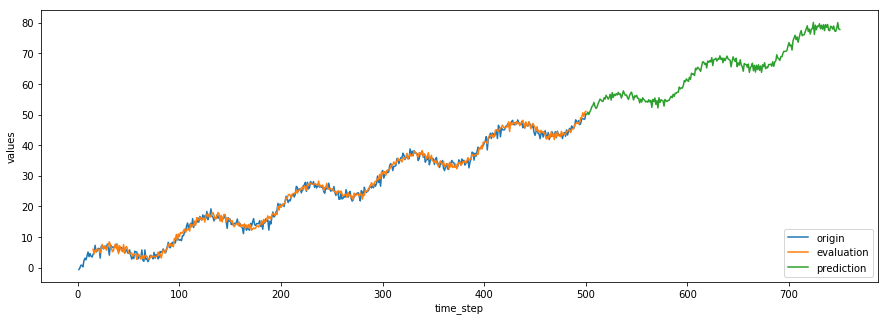

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend(loc=4)
plt.savefig('img/predict_result.jpg')